In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
!pip install k-means-constrained
from k_means_constrained import KMeansConstrained
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [2]:
roma = pd.read_excel('Roma_Places_to Visit.xlsx')
roma.head(5)

,Location,Latitud,Longitud,City,Estimated Time
0,Pantheon,41.898609,12.476873,Roma,0.75
1,Colosseo,41.890251,12.492373,Roma,1.50
2,Foro Romano,41.892464,12.485325,Roma,1.00
3,Palatino,41.888938,12.487445,Roma,1.00
4,Piazza Navona,41.899227,12.473085,Roma,0.50


In [3]:
dd1 = distance_matrix(roma[['Longitud','Latitud']], roma[['Longitud','Latitud']], p=1)

In [4]:
dd1 = pd.DataFrame(dd1)
dd1.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.023858,0.014597,0.020243,0.004406,0.008763,0.017078,0.015053,0.022737,0.011192,...,0.027067,0.023352,0.026864,0.031187,0.018843,0.008932,0.022506,0.013982,0.012594,0.006054
1,0.023858,0.000000,0.009261,0.006241,0.028264,0.019741,0.024220,0.038911,0.004087,0.012666,...,0.050925,0.047210,0.050722,0.055045,0.042701,0.014926,0.032972,0.035386,0.025694,0.029912
2,0.014597,0.009261,0.000000,0.005646,0.019003,0.010480,0.019385,0.029650,0.008922,0.003405,...,0.041664,0.037949,0.041461,0.045784,0.033440,0.009533,0.024813,0.026125,0.016433,0.020651
3,0.020243,0.006241,0.005646,0.000000,0.024649,0.016126,0.017979,0.035296,0.010328,0.009051,...,0.047310,0.043595,0.047107,0.051430,0.039086,0.011311,0.029357,0.031771,0.022079,0.026297
4,0.004406,0.028264,0.019003,0.024649,0.000000,0.011933,0.013908,0.010647,0.027143,0.015598,...,0.022661,0.018946,0.022458,0.026781,0.014437,0.013338,0.019336,0.017152,0.015764,0.001648


In [5]:
X = roma[['Longitud','Latitud']]

In [6]:
days = [2,3,4,5]

In [7]:
for d in days:
    KMeans = KMeansConstrained(n_clusters=d, size_min=25//d)
    Kmeans_pred = KMeans.fit_predict(X)
    roma[str(d)] = Kmeans_pred


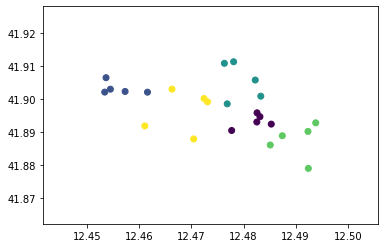

In [8]:
plt.scatter(X['Longitud'], X['Latitud'], c=Kmeans_pred)

# Agregando distancias: 2 clusters # 

In [9]:
roma_b = roma[['Location','Latitud','Longitud','City','2']]
roma_c = roma_b[roma_b['2']==0]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
Suma

0.06727599999999967

In [10]:
final_2a = roma_c
final_2a['Distance_2'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
roma_b = roma[['Location','Latitud','Longitud','City','2']]
roma_c = roma_b[roma_b['2']==1]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
Suma

0.0714601999999882

In [12]:
final_2b = roma_c
final_2b['Distance_2'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
roma_final_2 = final_2a.append(final_2b).sort_index(ascending=True)

# Agregando distancias: 3 clusters # 


In [14]:
roma_b = roma[['Location','Latitud','Longitud','City','3']]
roma_c = roma_b[roma_b['3']==0]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
final_3a = roma_c
final_3a['Distance_3'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
roma_b = roma[['Location','Latitud','Longitud','City','3']]
roma_c = roma_b[roma_b['3']==1]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
final_3b = roma_c
final_3b['Distance_3'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
roma_b = roma[['Location','Latitud','Longitud','City','3']]
roma_c = roma_b[roma_b['3']==2]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
final_3c = roma_c
final_3c['Distance_3'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
roma_final_3 = final_3a.append(final_3b).append(final_3c).sort_index(ascending=True)

# Agregando distancias: 4 clusters # 

In [18]:
roma_b = roma[['Location','Latitud','Longitud','City','4']]
roma_c = roma_b[roma_b['4']==0]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
final_4a = roma_c
final_4a['Distance_4'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
roma_b = roma[['Location','Latitud','Longitud','City','4']]
roma_c = roma_b[roma_b['4']==1]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
final_4b = roma_c
final_4b['Distance_4'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
roma_b = roma[['Location','Latitud','Longitud','City','4']]
roma_c = roma_b[roma_b['4']==2]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
final_4c = roma_c
final_4c['Distance_4'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
roma_b = roma[['Location','Latitud','Longitud','City','4']]
roma_c = roma_b[roma_b['4']==3]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
final_4d = roma_c
final_4d['Distance_4'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
roma_final_4 = final_4a.append(final_4b).append(final_4c).append(final_4d).sort_index(ascending=True)

# Agregando distancias: 5 clusters # 

In [23]:
roma_b = roma[['Location','Latitud','Longitud','City','5']]
roma_c = roma_b[roma_b['5']==0]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
final_5a = roma_c
final_5a['Distance_5'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
roma_b = roma[['Location','Latitud','Longitud','City','5']]
roma_c = roma_b[roma_b['5']==1]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
final_5b = roma_c
final_5b['Distance_5'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
roma_b = roma[['Location','Latitud','Longitud','City','5']]
roma_c = roma_b[roma_b['5']==2]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
final_5c = roma_c
final_5c['Distance_5'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
roma_b = roma[['Location','Latitud','Longitud','City','5']]
roma_c = roma_b[roma_b['5']==3]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
final_5d = roma_c
final_5d['Distance_5'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
roma_b = roma[['Location','Latitud','Longitud','City','5']]
roma_c = roma_b[roma_b['5']==4]
Z=linkage(roma_c[['Longitud','Latitud']], method= "single", metric='cityblock')
Suma = Z[:,2].sum()
final_5e = roma_c
final_5e['Distance_5'] = Suma

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
roma_final_5 = final_5a.append(final_5b).append(final_5c).append(final_5d).append(final_5e).sort_index(ascending=True)

In [29]:
#Consolidating tables

In [30]:
roma['Distance_2'] = roma_final_2['Distance_2']*138.3
roma['Distance_3'] = roma_final_3['Distance_3']*138.3
roma['Distance_4'] = roma_final_4['Distance_4']*138.3
roma['Distance_5'] = roma_final_5['Distance_5']*138.3

In [31]:
roma['Day2'] = roma['2'].astype(str) + ' ' + roma['Distance_2'].astype(str)
roma['Day3'] = roma['3'].astype(str) + ' ' + roma['Distance_3'].astype(str)
roma['Day4'] = roma['4'].astype(str) + ' ' + roma['Distance_4'].astype(str)
roma['Day5'] = roma['5'].astype(str) + ' ' + roma['Distance_5'].astype(str)
roma.drop(['2', '3','4','5','Distance_2', 'Distance_3', 'Distance_4', 'Distance_5'], axis=1)
roma.head(5)

,Location,Latitud,Longitud,City,Estimated Time,2,3,4,5,Distance_2,Distance_3,Distance_4,Distance_5,Day2,Day3,Day4,Day5
0,Pantheon,41.898609,12.476873,Roma,0.75,0,2,3,2,9.304271,5.275039,4.099212,3.685418,0 9.304270799999955,2 5.275038600000816,3 4.099212000000077,2 3.685418400000216
1,Colosseo,41.890251,12.492373,Roma,1.50,0,0,2,3,9.304271,6.278128,4.476771,3.695929,0 9.304270799999955,0 6.278128499998905,2 4.476770999998067,3 3.6959291999989827
2,Foro Romano,41.892464,12.485325,Roma,1.00,0,0,2,0,9.304271,6.278128,4.476771,2.039925,0 9.304270799999955,0 6.278128499998905,2 4.476770999998067,0 2.039925000000405
3,Palatino,41.888938,12.487445,Roma,1.00,0,0,2,3,9.304271,6.278128,4.476771,3.695929,0 9.304270799999955,0 6.278128499998905,2 4.476770999998067,3 3.6959291999989827
4,Piazza Navona,41.899227,12.473085,Roma,0.50,1,2,0,4,9.882946,5.275039,4.305998,5.237283,1 9.88294565999837,2 5.275038600000816,0 4.305998159999698,4 5.2372826999991


In [32]:
keep = roma[['Location','Latitud','Longitud','City','Estimated Time']]
dontkeep = roma[['Day2','Day3','Day4','Day5']]

In [33]:
roma_unpivoted = pd.melt(roma, id_vars=keep, value_vars=dontkeep, value_name = "Cluster+Dist")
roma_unpivoted.head(2)

,Location,Latitud,Longitud,City,Estimated Time,variable,Cluster+Dist
0,Pantheon,41.898609,12.476873,Roma,0.75,Day2,0 9.304270799999955
1,Colosseo,41.890251,12.492373,Roma,1.50,Day2,0 9.304270799999955


In [34]:
roma_unpivoted[['Cluster','Distance']] = roma_unpivoted['Cluster+Dist'].str.split(expand=True)

In [35]:
roma_unpivoted = roma_unpivoted.drop('Cluster+Dist', axis=1)
roma_unpivoted.head(2)

,Location,Latitud,Longitud,City,Estimated Time,variable,Cluster,Distance
0,Pantheon,41.898609,12.476873,Roma,0.75,Day2,0,9.304270799999955
1,Colosseo,41.890251,12.492373,Roma,1.50,Day2,0,9.304270799999955


In [36]:
roma_unpivoted['Distance'] = roma_unpivoted['Distance'].astype(float)

In [37]:
roma_unpivoted['Distance'] = round(roma_unpivoted['Distance'],4)
roma_unpivoted.head()

,Location,Latitud,Longitud,City,Estimated Time,variable,Cluster,Distance
0,Pantheon,41.898609,12.476873,Roma,0.75,Day2,0,9.3043
1,Colosseo,41.890251,12.492373,Roma,1.50,Day2,0,9.3043
2,Foro Romano,41.892464,12.485325,Roma,1.00,Day2,0,9.3043
3,Palatino,41.888938,12.487445,Roma,1.00,Day2,0,9.3043
4,Piazza Navona,41.899227,12.473085,Roma,0.50,Day2,1,9.8829


In [38]:
roma_unpivoted['Walking_Time'] = roma_unpivoted['Distance']/5
roma_unpivoted.head()

,Location,Latitud,Longitud,City,Estimated Time,variable,Cluster,Distance,Walking_Time
0,Pantheon,41.898609,12.476873,Roma,0.75,Day2,0,9.3043,1.86086
1,Colosseo,41.890251,12.492373,Roma,1.50,Day2,0,9.3043,1.86086
2,Foro Romano,41.892464,12.485325,Roma,1.00,Day2,0,9.3043,1.86086
3,Palatino,41.888938,12.487445,Roma,1.00,Day2,0,9.3043,1.86086
4,Piazza Navona,41.899227,12.473085,Roma,0.50,Day2,1,9.8829,1.97658


In [39]:
roma_unpivoted['Visit_Time'] = roma_unpivoted['Estimated Time']

In [40]:
roma_unpivoted = roma_unpivoted.drop(['Estimated Time'], axis=1)
roma_unpivoted.head(2)

,Location,Latitud,Longitud,City,variable,Cluster,Distance,Walking_Time,Visit_Time
0,Pantheon,41.898609,12.476873,Roma,Day2,0,9.3043,1.86086,0.75
1,Colosseo,41.890251,12.492373,Roma,Day2,0,9.3043,1.86086,1.50


In [41]:
roma_unpivoted['Total_Time'] = roma_unpivoted['Walking_Time'] + roma_unpivoted['Visit_Time']

In [42]:
roma_unpivoted.head(2)

,Location,Latitud,Longitud,City,variable,Cluster,Distance,Walking_Time,Visit_Time,Total_Time
0,Pantheon,41.898609,12.476873,Roma,Day2,0,9.3043,1.86086,0.75,2.61086
1,Colosseo,41.890251,12.492373,Roma,Day2,0,9.3043,1.86086,1.50,3.36086


In [43]:
roma_unpivoted["variable"] = roma_unpivoted["variable"].str.replace("Day", "")
roma_unpivoted.head(2)

,Location,Latitud,Longitud,City,variable,Cluster,Distance,Walking_Time,Visit_Time,Total_Time
0,Pantheon,41.898609,12.476873,Roma,2,0,9.3043,1.86086,0.75,2.61086
1,Colosseo,41.890251,12.492373,Roma,2,0,9.3043,1.86086,1.50,3.36086


In [44]:
roma_unpivoted.columns

Index(['Location', 'Latitud', 'Longitud', 'City', 'variable', 'Cluster',
       'Distance', 'Walking_Time', 'Visit_Time', 'Total_Time'],
      dtype='object')

In [46]:
roma_unpivoted = roma_unpivoted.rename(columns={"variable": "Number of Days"})
roma_unpivoted.head(3)

,Location,Latitud,Longitud,City,Number of Days,Cluster,Distance,Walking_Time,Visit_Time,Total_Time
0,Pantheon,41.898609,12.476873,Roma,2,0,9.3043,1.86086,0.75,2.61086
1,Colosseo,41.890251,12.492373,Roma,2,0,9.3043,1.86086,1.50,3.36086
2,Foro Romano,41.892464,12.485325,Roma,2,0,9.3043,1.86086,1.00,2.86086


In [47]:
roma_unpivoted.to_excel('Roma_Final_.xlsx')